In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\Umesh Gupta\\nlp\\review.csv")
df.head()

,Unnamed: 0,Review,Rating
0,0,Bad camera no use average watch,3
1,1,It's amazing watch more features is available\...,3
2,2,Love,5
3,3,Ghatiya watch ghatiya company dont buy this watch,1
4,4,Battery damage,5


In [3]:
print("The no. of Rows in dataset is: ",df.shape[0],"and no. of columns is ",df.shape[1])

The no. of Rows in dataset is:  25544 and no. of columns is  3


In [4]:
#checking datatype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25544 entries, 0 to 25543
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25544 non-null  int64 
 1   Review      25544 non-null  object
 2   Rating      25544 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 598.8+ KB


In [5]:
#checking basic distribution of data
df.describe()

,Unnamed: 0,Rating
count,25544.000000,25544.000000
mean,12771.500000,4.075478
std,7374.061974,1.375800
min,0.000000,1.000000
25%,6385.750000,4.000000
50%,12771.500000,5.000000
75%,19157.250000,5.000000
max,25543.000000,5.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
Review        0
Rating        0
dtype: int64

In [7]:
df.nunique()

Unnamed: 0    25544
Review        16574
Rating            5
dtype: int64

In [8]:
#dropping unwanted column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
print('Rating counts','\n',df.Rating.value_counts())

Rating counts 
 5    14924
4     4783
1     3128
3     1806
2      903
Name: Rating, dtype: int64


<AxesSubplot:>

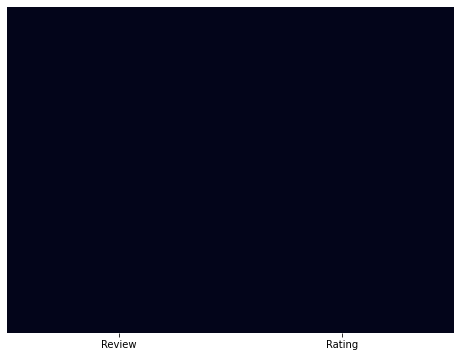

In [10]:
#Visualizing missing values if any through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='Rating', ylabel='count'>

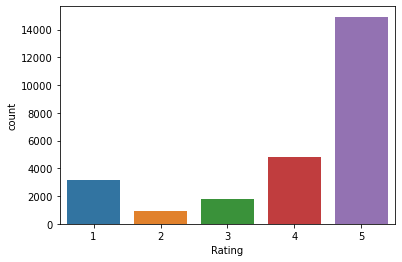

In [11]:
#checking distribution of rating
sns.countplot('Rating',data=df)

In [12]:
#checking length of document
df["original_len"] = df["Review"].str.len() 

In [13]:
#convert text to lowercase
df['Review']=df['Review'].str.lower()

In [14]:
cols=['Review']
for j in cols:
    # Replace email addresses with 'email'
    df[j] = df[j].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    df[j] = df[j].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    df[j] = df[j].str.replace(r'£|\$', 'dollers')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[j] = df[j].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


    # Replace numbers with 'numbr'
    df[j] = df[j].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    df[j] = df[j].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    df[j] = df[j].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    df[j] = df[j].str.replace(r'^\s+|\s+?$', '')

In [15]:
df.head()

,Review,Rating,original_len
0,bad camera no use average watch,3,31
1,it s amazing watch more features is available ...,3,108
2,love,5,4
3,ghatiya watch ghatiya company dont buy this watch,1,49
4,battery damage,5,14


In [16]:
# remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])
df["Review"]= df["Review"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

In [17]:
#Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
#This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, 
#such as neighboring sentences or even an entire document.
lem=WordNetLemmatizer()
df["Review"] = df["Review"].apply(lambda x: ' '.join(
 lem.lemmatize(word) for word in x.split()))

In [18]:
#checking clean length
df["clean_len"] = df["Review"].str.len() 

In [19]:
df.head()

,Review,Rating,original_len,clean_len
0,bad camera use average watch,3,31,28
1,amazing watch feature available ok good produc ok,3,108,49
2,love,5,4,4
3,ghatiya watch ghatiya company buy watch,1,49,39
4,battery damage,5,14,14


In [20]:
print('original Review length', df.original_len.sum())
print('clean Review length', df.clean_len.sum())

original Review length 3100483
clean Review length 2162123


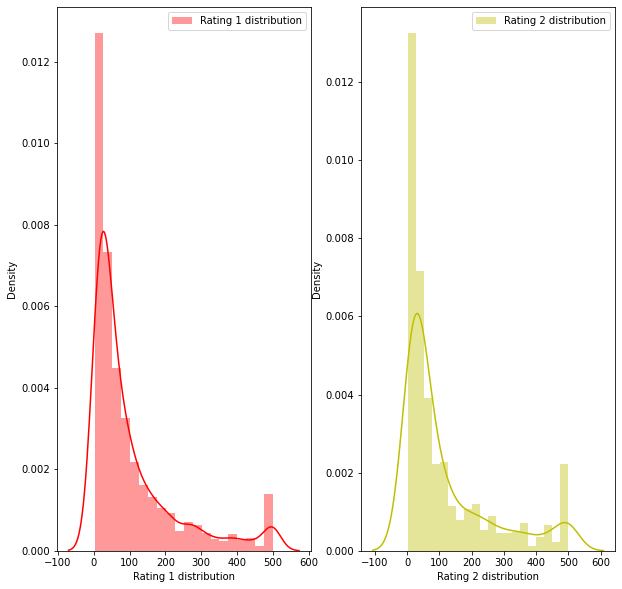

In [21]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Rating']==1]['original_len'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Rating']==2]['original_len'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

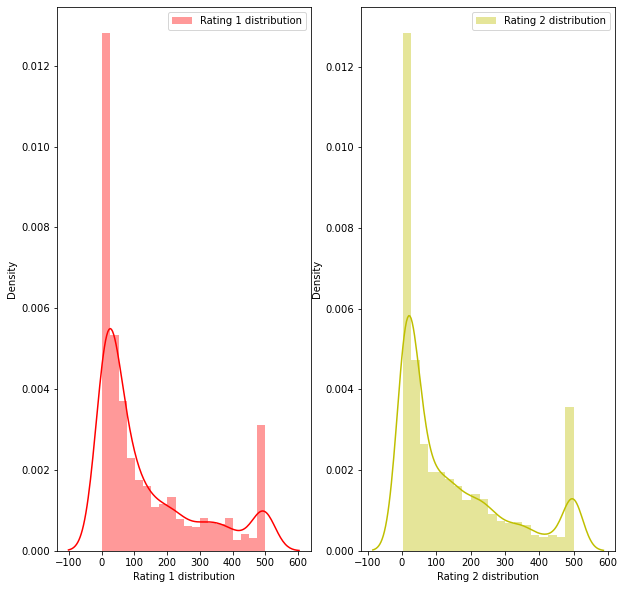

In [22]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Rating']==3]['original_len'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Rating']==4]['original_len'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

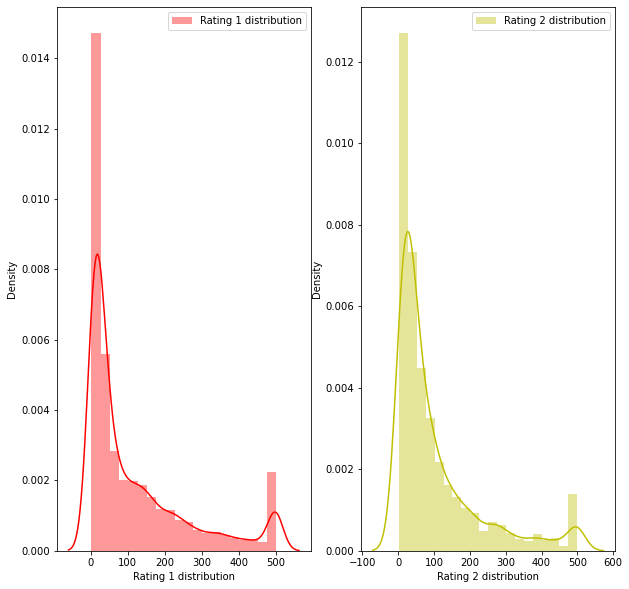

In [23]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Rating']==5]['original_len'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Rating']==1]['original_len'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

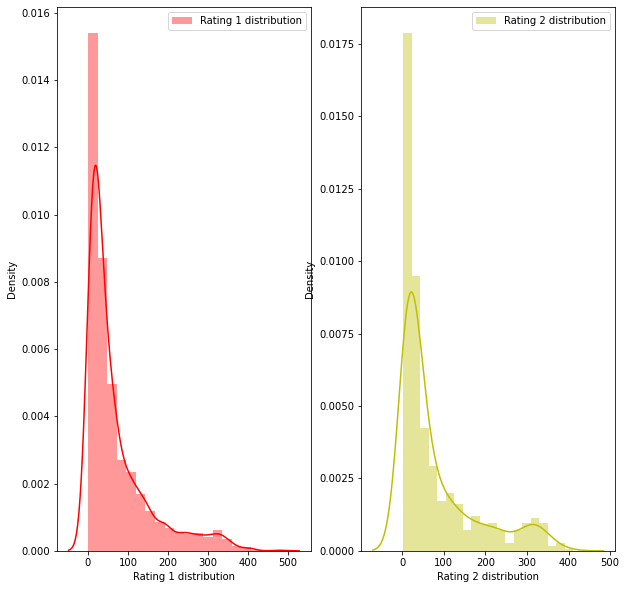

In [24]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Rating']==1]['clean_len'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Rating']==2]['clean_len'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

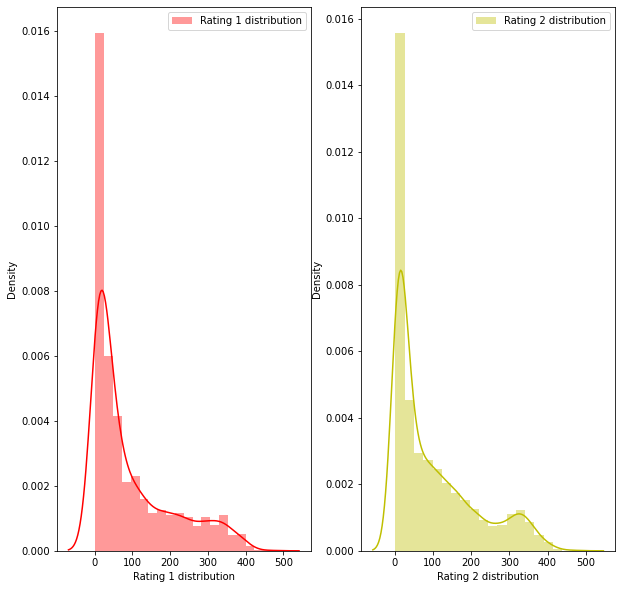

In [25]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Rating']==3]['clean_len'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Rating']==4]['clean_len'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

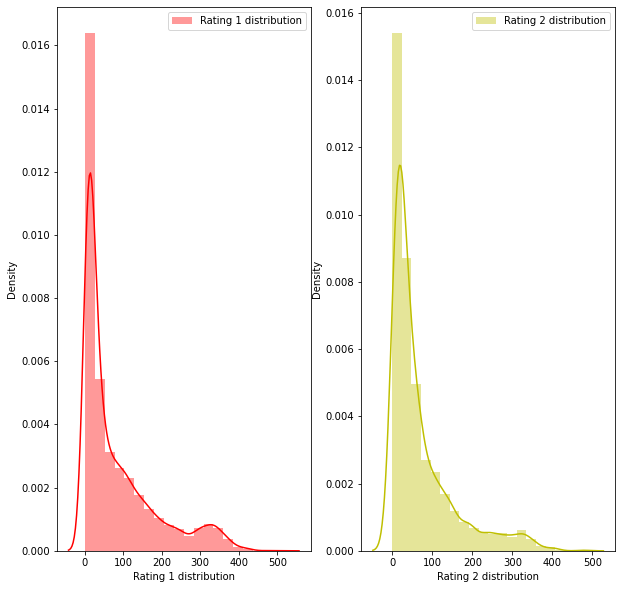

In [26]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Rating']==5]['clean_len'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Rating']==1]['clean_len'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

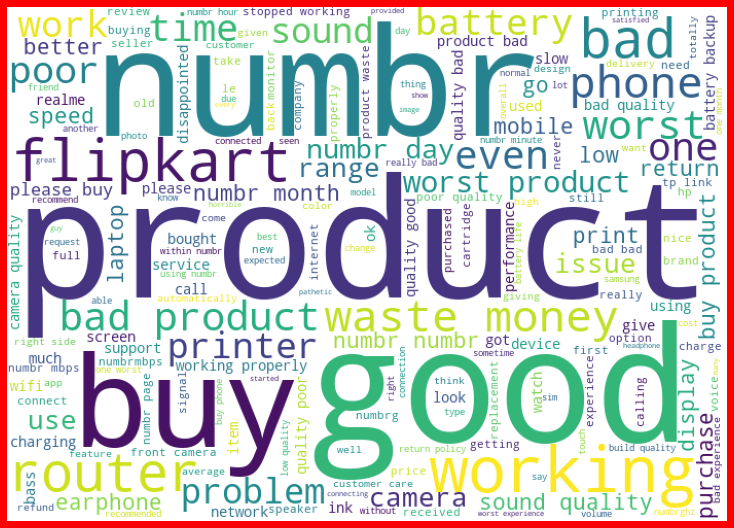

In [28]:
#Getting sense of words in Rating 1
one = df['Review'][df['Rating']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

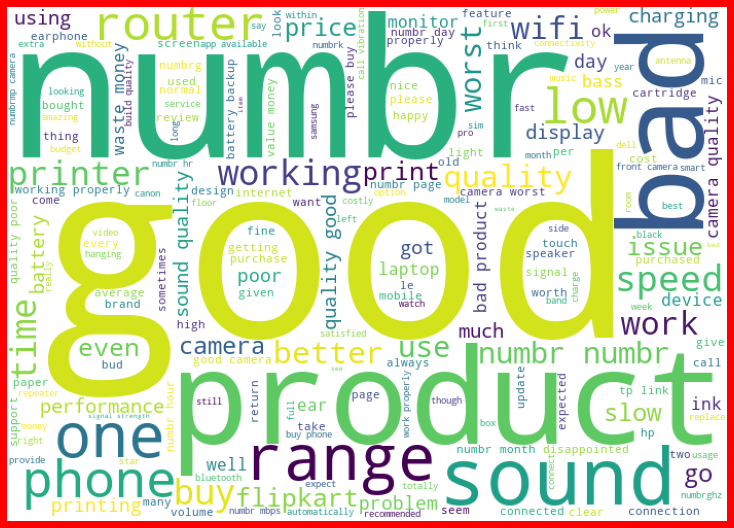

In [29]:
#Getting sense of words in Rating 2
one = df['Review'][df['Rating']==2]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

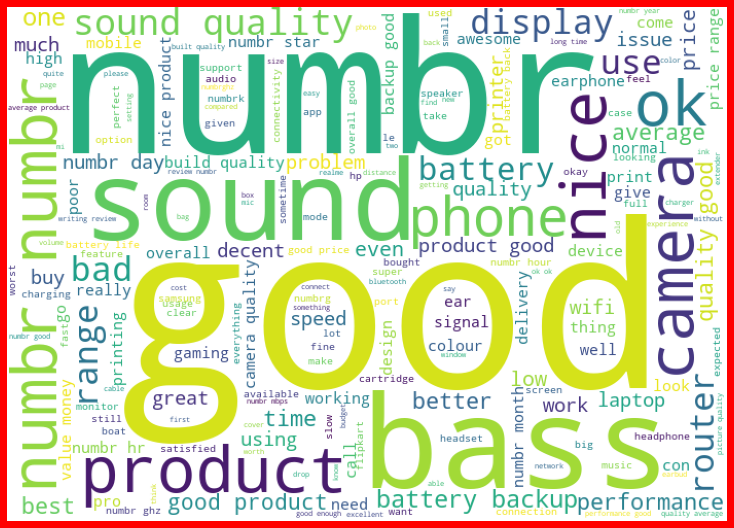

In [30]:
#Getting sense of words in Rating 3
one = df['Review'][df['Rating']==3]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

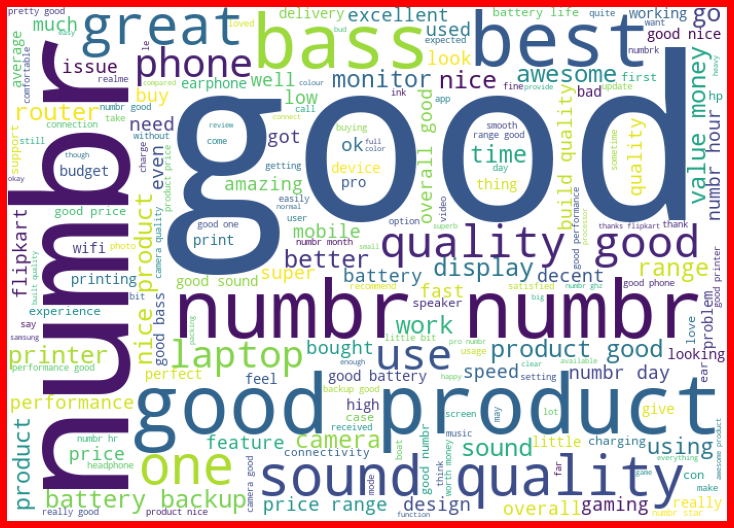

In [31]:
#Getting sense of words in Rating 4
one = df['Review'][df['Rating']==4]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

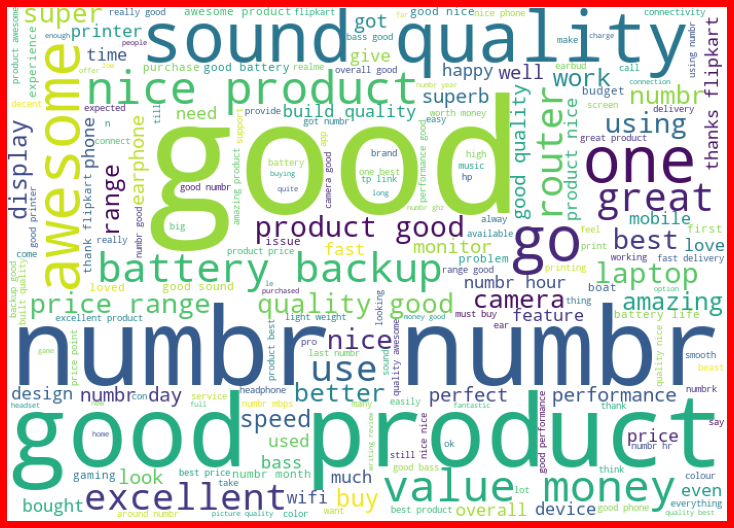

In [32]:
#Getting sense of words in Rating 5
one = df['Review'][df['Rating']==5]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
# 1. Convert text into vectors using TF-IDF
# 2. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['Review'])

x = features
y = df['Rating']

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [35]:
#handling imbalanced data through smote technique
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(sampling_strategy = {1: 25544, 2: 25544, 3: 25544, 4: 25544, 5: 25544})
x1,y1=os.fit_resample(x,y)
print("The number of classes before fit{}".format(Counter(y1)))
print("The number of classes after fit {}".format(Counter(y1)))

The number of classes before fitCounter({5: 25518, 1: 25494, 2: 25490, 4: 25486, 3: 25482})
The number of classes after fit Counter({5: 25518, 1: 25494, 2: 25490, 4: 25486, 3: 25482})


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.30,random_state=150)

# LogisticRegression

In [37]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

y_pred= lr.predict(x_test)

In [38]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           1       0.76      0.82      0.79      7658
           2       0.79      0.75      0.77      7510
           3       0.72      0.66      0.69      7738
           4       0.57      0.59      0.58      7728
           5       0.61      0.63      0.62      7607

    accuracy                           0.69     38241
   macro avg       0.69      0.69      0.69     38241
weighted avg       0.69      0.69      0.69     38241



In [39]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(lr,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

accuracy_score :  0.6892079182029759 
 cross validation score : 0.678269396720797 
F1 Score : 0.6889456973596138


[[6261  670  297  301  129]
 [1039 5630  404  338   99]
 [ 388  430 5098  993  829]
 [ 217  187  753 4569 2002]
 [ 344  194  485 1786 4798]]


AxesSubplot(0.125,0.125;0.62x0.755)


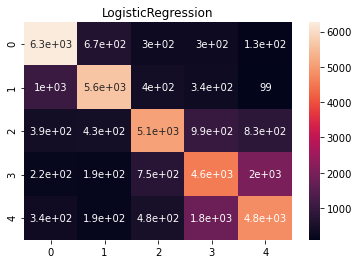

In [40]:
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
print('\n')
plt.title("LogisticRegression")
print(sns.heatmap(conf_mat,annot=True))

In [41]:
accuracy = []
cross_val = []
diff=[]
f1=[]
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
f1.append(f)

# MultinomialNB

In [42]:
mb= MultinomialNB()
mb.fit(x_train,y_train)

y_pred=mb.predict(x_test)

In [43]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           1       0.73      0.77      0.75      7658
           2       0.77      0.68      0.72      7510
           3       0.69      0.64      0.66      7738
           4       0.56      0.61      0.59      7728
           5       0.61      0.64      0.63      7607

    accuracy                           0.67     38241
   macro avg       0.67      0.67      0.67     38241
weighted avg       0.67      0.67      0.67     38241



In [44]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(mb,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

accuracy_score :  0.6677649643053267 
 cross validation score : 0.6480583666745116 
F1 Score : 0.6667098020207927


[[5910  758  487  364  139]
 [1380 5096  513  429   92]
 [ 449  445 4936 1019  889]
 [ 166  164  712 4727 1959]
 [ 151  167  541 1881 4867]]


AxesSubplot(0.125,0.125;0.62x0.755)


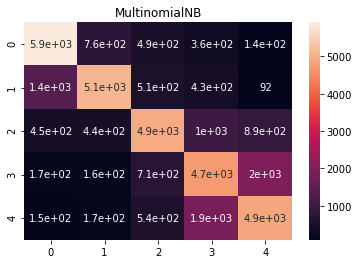

In [45]:
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
print('\n')
plt.title("MultinomialNB")
print(sns.heatmap(conf_mat,annot=True))

In [46]:
accuracy.append(a)
cross_val.append(c)
f1.append(f)
diff.append(a-c)

# DecisionTreeClassifier 

In [47]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)

In [48]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           1       0.89      0.88      0.89      7658
           2       0.90      0.91      0.90      7510
           3       0.86      0.79      0.83      7738
           4       0.68      0.74      0.71      7728
           5       0.71      0.71      0.71      7607

    accuracy                           0.81     38241
   macro avg       0.81      0.81      0.81     38241
weighted avg       0.81      0.81      0.81     38241



In [49]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(dt,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

accuracy_score :  0.8067257655396041 
 cross validation score : 0.7947673962500982 
F1 Score : 0.805721012324119


[[6772  380  132  240  134]
 [ 321 6807   93  215   74]
 [ 132  146 6151  763  546]
 [ 114  115  371 5691 1437]
 [ 237  118  381 1442 5429]]


AxesSubplot(0.125,0.125;0.62x0.755)


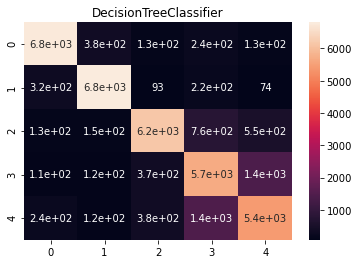

In [50]:
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
print('\n')
plt.title("DecisionTreeClassifier")
print(sns.heatmap(conf_mat,annot=True))

In [51]:
accuracy.append(a)
cross_val.append(c)
f1.append(f)
diff.append(a-c)

# BaggingClassifier

In [52]:
bg= BaggingClassifier()
bg.fit(x_train,y_train)

y_pred=bg.predict(x_test)

In [53]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           1       0.91      0.90      0.90      7658
           2       0.91      0.92      0.91      7510
           3       0.88      0.82      0.85      7738
           4       0.70      0.77      0.73      7728
           5       0.75      0.73      0.74      7607

    accuracy                           0.83     38241
   macro avg       0.83      0.83      0.83     38241
weighted avg       0.83      0.83      0.83     38241



In [54]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(bg,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

accuracy_score :  0.8269658220234827 
 cross validation score : 0.8194398682042833 
F1 Score : 0.8262508686619422


[[6892  333  116  208  109]
 [ 313 6903   70  179   45]
 [  94  143 6360  694  447]
 [  72  114  351 5937 1254]
 [ 217  112  329 1417 5532]]


AxesSubplot(0.125,0.125;0.62x0.755)


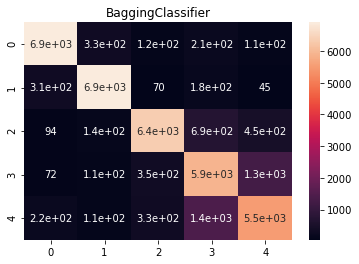

In [55]:
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
print('\n')
plt.title("BaggingClassifier")
print(sns.heatmap(conf_mat,annot=True))

In [56]:
accuracy.append(a)
cross_val.append(c)
f1.append(f)
diff.append(a-c)

# XGBClassifier

In [57]:
xg= XGBClassifier(verbosity=0)
xg.fit(x_train,y_train)

y_pred=xg.predict(x_test)

In [58]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           1       0.77      0.87      0.82      7658
           2       0.88      0.78      0.83      7510
           3       0.84      0.69      0.76      7738
           4       0.61      0.68      0.65      7728
           5       0.66      0.69      0.67      7607

    accuracy                           0.74     38241
   macro avg       0.75      0.74      0.74     38241
weighted avg       0.75      0.74      0.74     38241



In [59]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(xg,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

accuracy_score :  0.7413509060955519 
 cross validation score : 0.7309876833764807 
F1 Score : 0.7396910580936897


[[6692  374  165  315  112]
 [1086 5842  198  328   56]
 [ 460  172 5313 1011  782]
 [ 156  111  408 5289 1764]
 [ 329  124  231 1709 5214]]


AxesSubplot(0.125,0.125;0.62x0.755)


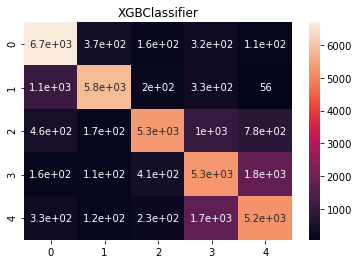

In [60]:
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
print('\n')
plt.title("XGBClassifier")
print(sns.heatmap(conf_mat,annot=True))

In [61]:
accuracy.append(a)
cross_val.append(c)
f1.append(f)
diff.append(a-c)

# RandomForestClassifier

In [62]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

In [63]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           1       0.94      0.93      0.94      7658
           2       0.94      0.93      0.94      7510
           3       0.95      0.86      0.90      7738
           4       0.78      0.85      0.81      7728
           5       0.81      0.84      0.83      7607

    accuracy                           0.88     38241
   macro avg       0.89      0.88      0.88     38241
weighted avg       0.89      0.88      0.88     38241



In [64]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(rf,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

accuracy_score :  0.8814100049684893 
 cross validation score : 0.8774299835255355 
F1 Score : 0.8803218131045429


[[7110  262   49  166   71]
 [ 244 7017   38  173   38]
 [  40   88 6627  596  387]
 [  33   37  141 6557  960]
 [ 120   31  146  915 6395]]


AxesSubplot(0.125,0.125;0.62x0.755)


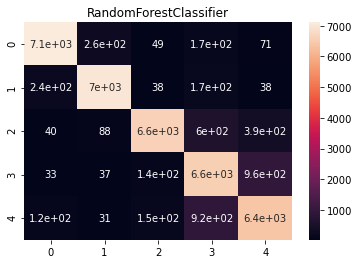

In [65]:
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
print('\n')
plt.title("RandomForestClassifier")
print(sns.heatmap(conf_mat,annot=True))

In [66]:
accuracy.append(a)
cross_val.append(c)
f1.append(f)
diff.append(a-c)

In [67]:
model = ["LogisticRegression","MultinomialNB","DecisionTreeClassifier","BaggingClassifier","XGBClassifier","RandomForestClassifier"]

In [68]:
classifier = pd.DataFrame({"MODEL":model,"Accuracy score":accuracy,"Cross_validation_Score":cross_val,"F1 Score":f1,"difference":diff})

classifier

,MODEL,Accuracy score,Cross_validation_Score,F1 Score,difference
0,LogisticRegression,0.689208,0.678269,0.688946,0.010939
1,MultinomialNB,0.667765,0.648058,0.666710,0.019707
2,DecisionTreeClassifier,0.806726,0.794767,0.805721,0.011958
3,BaggingClassifier,0.826966,0.819440,0.826251,0.007526
4,XGBClassifier,0.741351,0.730988,0.739691,0.010363
5,RandomForestClassifier,0.881410,0.877430,0.880322,0.003980


In [69]:
#logistic regression
print("LogisticRegression roc_auc_score :",roc_auc_score(y_test,lr.predict_proba(x_test),multi_class='ovr'))


#BaggingClassifier
print("BaggingClassifier roc_auc_score :",roc_auc_score(y_test,bg.predict_proba(x_test),multi_class='ovr'))

#DecisionTree
print("DecisionTree roc_auc_score :",roc_auc_score(y_test,dt.predict_proba(x_test),multi_class='ovr'))

#RandomForestClassifier
print("RandomForestClassifier roc_auc_score :",roc_auc_score(y_test,rf.predict_proba(x_test),multi_class='ovr'))

#MultinomialNB
print("MultinomialNB roc_auc_score :",roc_auc_score(y_test,mb.predict_proba(x_test),multi_class='ovr'))

#XGBClassifier
print("XGBClassifier roc_auc_score :",roc_auc_score(y_test,xg.predict_proba(x_test),multi_class='ovr'))



LogisticRegression roc_auc_score : 0.9211837500339823
BaggingClassifier roc_auc_score : 0.9680777040932984
DecisionTree roc_auc_score : 0.92171291867558
RandomForestClassifier roc_auc_score : 0.9844140948853326
MultinomialNB roc_auc_score : 0.9097712084594631
XGBClassifier roc_auc_score : 0.9412924512669335


random forest is my best model as it is showing least difference, good auc_roc_score and good f1 score

# hyper para meter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators': [100, 200, 300],
           'criterion':["gini","entropy"],
           'bootstrap':[True,False],
           'oob_score':[True,False],
           'max_features':["auto", "sqrt", "log2"]}

rf=RandomForestClassifier()

grid_search=GridSearchCV(rf,parameters,cv=3)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred1=rf.predict(x_test)

In [ ]:
# a=accuracy_score(y_test,y_pred1)
# c=cross_val_score(rf,x1,y1,cv=3).mean()
# f=f1_score(y_pred1,y_test,average="weighted")
# print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

In [ ]:
# import pickle
# pickle.dump(xgb,open("review.pk1","wb"))

In [ ]:
# test=pd.DataFrame(data=y_test,)
# test['Predicted values']=RFpred

# test.to_csv('Ratings_Predict.csv')

# test

In [ ]:
# import pickle
# filename='review.pk1'
# pickle.dump(lr,open(filename,'wb'))